In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.metrics import f1_score, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, StratifiedKFold
import warnings; warnings.simplefilter('ignore')
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [87]:

path_dataset_after_data_clean = "data/classification.csv"
# path_dataset_after_data_clean = "data/Diabete.csv"


In [88]:
df = pd.read_csv(path_dataset_after_data_clean, sep=";")


In [89]:
df.head(2)


,Y,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,0,-0.975348,1.026274,-1.789708,0.632264,0.696836,-1.460567,-0.056910,2.016188,-0.236022,0.966914
1,0,0.863402,1.293269,-0.487214,0.614807,-1.051546,-1.273851,-1.467305,1.388982,1.457754,-0.716669


In [90]:
#We should first separate the target from the features.
X = df.drop('Y', axis=1)
y = df['Y']


In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)


**K-NN**

First, you choose the basis of the model you want to use to predict strokes. Here, you will use a K-NN model.

KNN is good for a binary classifier such as stroke detection because it is a simple and effective algorithm that makes predictions based on the closest data points in the feature space, which can effectively distinguish between the two classes in the binary classification task.

In [92]:
#Let's try with 5 neighbors
k = 5
knn = KNeighborsClassifier(n_neighbors=k)


**K-fold cross-validation**

In K-fold cross-validation, the data is divided into K folds, and the model is trained K times, each time using a different fold as the validation set and the remaining folds as the training set. The results of the K runs are then averaged to produce a single performance measure, which provides an estimate of the model's generalization performance.

K-fold cross validation is important in machine learning as it provides a robust evaluation of a model's performance by splitting the data into K folds and training the model on K-1 folds while evaluating its performance on the remaining fold, which helps to mitigate the risk of overfitting and provides a more accurate estimate of the model's generalization ability.

cross_validate:

Type of cross validation :
by default : the default 5-fold cross validation BUT here, we specified cv=3, which means 3 stratified K-folds
Stratified : The folds are made by preserving the percentage of samples for each class.
Score/Metrics:
The Accuracy score is calculated by dividing the number of correct predictions by the total prediction number. It is not a good metric when the dataset is imbalanced.
The Recall score is calculated by dividing the number of positive samples classified correctly as positive by the total number of positive samples.
The Precision score is calculated as the ratio between the number of Positive samples correctly classified to the total number of samples classified as Positive (either correctly or incorrectly).
The F1 score conveys the balance between the precision and the recall.
Here we are doing the cross validation on the train dataset and not on the whole because we have learned the behavior of the variables to be encoded on the train and not on both. It's about being consistent all the way.

In [93]:
results = cross_validate(
    knn,
    X_train,
    y_train,
    cv=5,
    scoring=["accuracy", "precision", "recall", "f1", "roc_auc"],
)


In [94]:
results


{'fit_time': array([0.00234771, 0.00170064, 0.0018518 , 0.00114322, 0.00133348]),
 'score_time': array([0.0145669 , 0.01441979, 0.01136088, 0.01207471, 0.011235  ]),
 'test_accuracy': array([0.775  , 0.76875, 0.76875, 0.75   , 0.81875]),
 'test_precision': array([0.79166667, 0.77333333, 0.75949367, 0.72941176, 0.79761905]),
 'test_recall': array([0.73076923, 0.74358974, 0.76923077, 0.78481013, 0.84810127]),
 'test_f1': array([0.76      , 0.75816993, 0.76433121, 0.75609756, 0.82208589]),
 'test_roc_auc': array([0.86507192, 0.83653846, 0.85420575, 0.82497265, 0.89967182])}

In [95]:
accuracy_folds = results['test_accuracy']
print("accuracy folds: ", accuracy_folds)
print("mean accuracy: ", round(np.mean(accuracy_folds), 3))
print("std accuracy: ", round(np.std(accuracy_folds), 2))


accuracy folds:  [0.775   0.76875 0.76875 0.75    0.81875]
mean accuracy:  0.776
std accuracy:  0.02


In [96]:
recall = results['test_recall']
print("recall folds: ", recall)
print("mean recall_loss: ", round(np.mean(recall), 2))
print("std recall_loss: ", round(np.std(recall), 2))


recall folds:  [0.73076923 0.74358974 0.76923077 0.78481013 0.84810127]
mean recall_loss:  0.78
std recall_loss:  0.04


In [97]:
precision = results['test_precision']
print("precision folds: ", precision)
print("mean precision_loss: ", round(np.mean(precision), 2))
print("std precision_loss: ", round(np.std(precision), 2))


precision folds:  [0.79166667 0.77333333 0.75949367 0.72941176 0.79761905]
mean precision_loss:  0.77
std precision_loss:  0.02


In [98]:
f1 = results['test_precision']
print("f1 folds: ", f1)
print("mean f1_loss: ", round(np.mean(f1), 2))
print("std f1_loss: ", round(np.std(f1), 2))

f1 folds:  [0.79166667 0.77333333 0.75949367 0.72941176 0.79761905]
mean f1_loss:  0.77
std f1_loss:  0.02


In [99]:
f1 = results['test_f1']
print("roc_auc folds: ", f1)
print("mean roc_auc: ", round(np.mean(f1), 2))
print("std roc_auc: ", round(np.std(f1), 2))


roc_auc folds:  [0.76       0.75816993 0.76433121 0.75609756 0.82208589]
mean roc_auc:  0.77
std roc_auc:  0.03


*The results are not bad but can be improved. We need to work on the parameters of the model (example: k) to improve results.* ==> **Grid search**

Grid search
Second, you would typically use some form of model selection and hyperparameter tuning to optimize the model parameters. This could involve methods such as grid search, random search, or Bayesian optimization, among others. The goal of this step is to find the best set of model parameters that minimize some chosen loss function.

A grid search is important in machine learning as it is a systematic and exhaustive search through a range of hyperparameter values to determine the optimal combination that results in the best performance for a model.

We will combine the grid search and the cross validation. Our optimal k is the k that will lower either the average F1 score on the different test sets (corresponding to the 3 stratified folds in the K-folds cross validation).

At some point, we will want to test our model on unseen data because we do not want to "cheat": so we need to find the best k on our training dataset.

**Grid search 1**

In [109]:
k_grid = np.arange(1, 500, 5)
output_mean = {}
for k in k_grid:
    knn = KNeighborsClassifier(n_neighbors=k)
    results_k = cross_validate(knn, X_train, y_train, cv=5,scoring=['accuracy','recall', 'precision','f1'])
    f1_k = results_k['test_f1']
    output_mean[k] = f1_k.mean()


In [110]:
names = list(output_mean.keys())
values = list(output_mean.values())


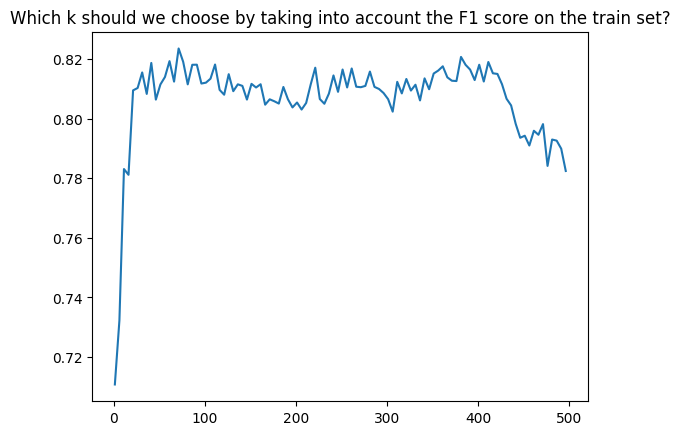

In [111]:
plt.plot(names, values)
plt.title('Which k should we choose by taking into account the F1 score on the train set?')
plt.show()


**Grid search 2**

*Another way to do a grid_search with a cross validation and optimize more parameters*

In the k-Nearest Neighbor (KNN) algorithm, the 'weights' parameter determines the weight assigned to each of the nearest neighbors for making a prediction.

The two options for the 'weights' parameter are:

'uniform': This option assigns equal weight to each of the k nearest neighbors.

'distance': This option assigns higher weight to the nearest neighbors and lower weight to the more distant neighbors. In other words, closer neighbors have more influence on the prediction.

The 'metric' parameter determines the distance metric used to calculate the distance between instances. The two options for the 'metric' parameter are:

-'euclidean': This is the standard straight-line distance between two points. The euclidean distance between two instances is calculated as the square root of the sum of the squared differences between the corresponding elements of the instances.

-'manhattan': This is the sum of the absolute differences between the corresponding elements of the instances. This metric is also known as the Manhattan distance or the L1 distance.

In KNN, it is important to choose the appropriate 'weights' and 'metric' parameters as they can have a significant impact on the accuracy of the predictions.

In [118]:
grid_params = {
    "n_neighbors": [1, 2, 3, 4, 5, 10, 16, 19, 20, 21, 22, 25],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"],
}


In [119]:
gs = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    verbose=1,
    cv=3,
    n_jobs=-1,
    scoring="f1",
)


In [121]:
gs_results = gs.fit(X_train, y_train)


Fitting 3 folds for each of 48 candidates, totalling 144 fits


In [130]:
gs_results.best_params_


{'metric': 'euclidean', 'n_neighbors': 25, 'weights': 'distance'}

In [132]:
knn = KNeighborsClassifier(n_neighbors=gs_results.best_params_['n_neighbors'], 
                           weights=gs_results.best_params_['weights'], 
                           metric=gs_results.best_params_['metric'])
# alternative: KNeighborsClassifier(**gs_results.best_params_)
knn

,n_neighbors,25
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'euclidean'
,metric_params,None
,n_jobs,None


In [135]:
knn.fit(X_train, y_train)

# Evaluate the model on the training data
f1_score_loss = f1_score(y_test, knn.predict(X_test))

# Print the F1 score 
# In scikit-learn, the f1_score function returns two separate measures for binary classification problems, one for each class. This allows you to evaluate the performance of the classifier for each class individually, and it can be useful when the classes are imbalanced. 
print("f1_score:", f1_score_loss)


f1_score: 0.797979797979798


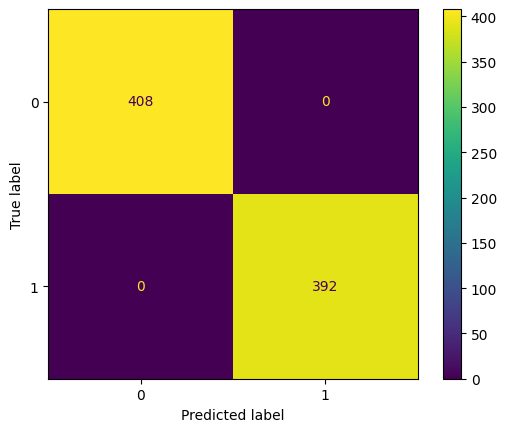

In [136]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_train,  knn.predict(X_train), labels=knn.classes_))
disp.plot()
plt.show()


Do we have bias ?



In [141]:
# Evaluate the model on the test data
f1_score_loss = f1_score(y_test, knn.predict(X_test))

# Print the F1 score for the test data
print("f1_score:", f1_score_loss)


f1_score: 0.797979797979798


In [142]:
# Evaluate the model on the test data
roc_score = roc_auc_score(y_test, knn.predict(X_test))

# Print the roc_score for the test data
print("roc_score:", roc_score)


roc_score: 0.8001200480192078


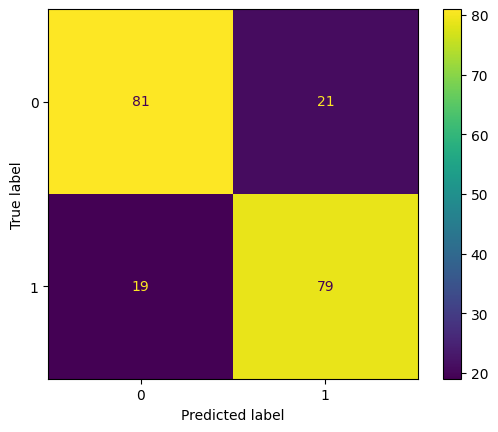

In [143]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test,  knn.predict(X_test), labels=knn.classes_))
disp.plot()
plt.show()
